# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [8]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


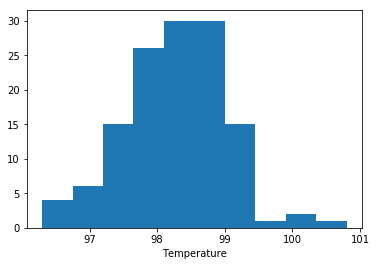

130

In [17]:
plt.hist(df.temperature)
plt.xlabel('Temperature')
plt.show()


In [20]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

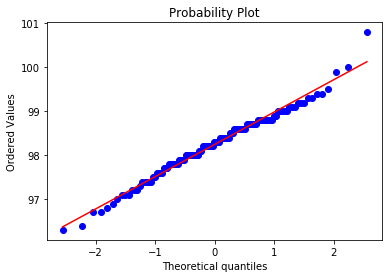

In [25]:
import pylab 
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

Answer 1: The distribution of body temperatures is normal.  The histogram gives a visual representation of this.
The QQ plot gives another visual indication that the distribution is normal since it shows a relatively straight
line with a positive slope. The normaltest pvalue of .259 is significantly larger than .05, indicating 
this data is normally distriuted.

In [22]:
len(df.temperature)

130

Answer 2: The sample size of 130 is significantly > 30, and therfore large.  The observations are independent
since the probability of an observation is not impated by another observation.

In [31]:
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
print('mean:', temp_mean, '  standard deviation:',temp_std )

mean: 98.24923076923078   standard deviation: 0.7331831580389454


In [32]:
zscore = (98.6 - temp_mean)/temp_std
print('98.6 degrees is', zscore, 'standard deviations from our sample mean')

98.6 degrees is  0.4784196512470687  standard deviations from our sample mean


In [36]:
# null hypothesis = temp is 98.6 degrees

from statsmodels.stats.weightstats import ztest
print(ztest(df.temperature,value=98.6))
print(stats.ttest_1samp(df.temperature,98.6))

(-5.4548232923645195, 4.9021570141012155e-08)
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Answer 3: We cannot know true mean of the population, we can only estimate based on the sample. A one-sample
test is appropriate since there is not relationship between the independent measured outcomes.  It is 
appropriate to use the z statistic in this case since our sample size is larger than 30.  The t statistic 
is used for smaller sample sizes.  

With both the t test and the z test we have very small pvalues, indicating that 98.6 degrees is very unlikely
to be the correct temperature mean of the total population.  The Z test result gives a smaller pvalue
suggesting a higher degree of certainty that 98.6 degrees is not the correct mean.

In [41]:
# 1.96 is used to get us the 95% confidence interval
standard_error = temp_std/np.sqrt(len(df))
margin_error = 1.96 * standard_error
print('Abnormal (i.e. 95% would be within range) is lower than', (temp_mean - margin_error), 'and higher than', (temp_mean + margin_error))

Abnormal (i.e. 95% would be within range) is lower than 98.1231941122 and higher than 98.3752674262


In [45]:
male_mean = df[df['gender'] == 'M'].temperature.mean()
female_mean = df[df['gender'] == 'F'].temperature.mean()
print('Means - male:', male_mean, 'female:', female_mean,' difference:', (male_mean - female_mean))

Means - male: 98.1046153846154 female: 98.39384615384613  difference: -0.289230769230727


In [69]:
# They are clearly different.  Need to do independent 2 sample ttest
import math
males = df[df['gender'] == 'M'].temperature
females = df[df['gender'] == 'F'].temperature

print('zvalue = ',.28923 / math.sqrt((males.std()**2)/len(males) + (females.std()**2)/len(females)))

zvalue =  2.2854284598822616


Value cocresponding to z value is .0110.  This is smaller than .05, so we reject the null hypothesis
that the temperature differences are statistically insignificant.

In samples of 65 men and 65 women with temperatures taken it was discovered that there is a statistically
significant difference .289 degrees difference in mean temperatures.